# Lab 04: Uporaba linearnega programiranja v telekomunikacijah
> 04: Linear programming in telecommunications

Pri operacijskih raziskavah pogosto naletimo na probleme, ki jih lahko rešujemo kot LP probleme. Glavni izziv LP problemov
 ni proces reševanja temveč formuliranje problema, kriterijske funkcije ter omejitev. 

## Programska oprema /software LPSolve

LP Solve rešuje probleme linearnega programiranja. V program zapišemo kriterijsko funkcjo (kateri določimo min / max), omejitve ter po potrebi še definiramo tip naših spremenljivk (bin / int). Program nato sam izračuna vse možne rešitve in jih prikaže.

> LP Solve was introduced during the lectures. The program requires us to correctly formulate the criteria 
function (min / max), constraints and variable declaration. The program then solves the problem and 
presents us with the possible solutions. 

> LPSolve is available for download here:

https://sourceforge.net/projects/lpsolve/

## Primer 1: Optimalno število naročnikov 
> Example 1: Optimal number of subscribers

Naloga: zapišimo problem v obliki kriterijske funkcije in omejitev, ki jih vstavimo v LPSolve, 
in ta nam izračuna optimalno rešitev. 
> Task: Based on the problem description, we derive optimization criteria and constraints, and 
> solve problem using the LPSolve software.

Opis problema 1: <br>

Nov mobilni operater se pripravlja za vstop na tržišče. Ker še nima svoje infrastrukture oddajnikov, se je z že 
obstoječim operaterjem dogovoril za najem njegovega omrežja. Zakupil je mesečno kapaciteto 1000 SMS sporočil, ter 2000 minut pogovora. 

Svojim naročnikom bo operater ponudil paket za fizične osebe z mesečno naročnino 20€/mesec ter paket za pravne 
osebe in podjetja z mesečno naročnino 40€/mesec. Predhodne tržne raziskave so pokazale, da 
fizične osebe v povprečju pošljejo do 40 SMS sporočil in opravijo za 20 minut pogovorov, pravne pa 
10 SMS sporočil ter 50 minut pogovorov.

Koliko katerih uporabnikov mora pridobiti operater, da bo optimalno izkoristil zakupljene  kapacitete in 
hkrati imel maksimalni zaslužek?

> Problem 1 description:

> A new mobile service provider is entering the market. Since it does not yet have it’s own infrastructure it  
>decided to lease capacities from an existing provider. The provider leased 1000 SMS / month and 2000 minutes / month.
> The service provider will offer a package for personal use costing 20€ / month and a business package costing 40€ / month.
> Preliminary market research shows that a typical user sends 40 SMS each month and talks for 20 minutes while business 
>users send 10 SMS and spend 50 minutes.
>
> Task: Calculate, how many of each type of packages must the provider sell in order to earn maximum profit, 
>given the available leased capacities.                                    
   

### Reševanje z LPSolve
> How to use LPSolve for solving this problem.

Spremenljivki, ki jih moramo določiti, sta naslednji  / We have the following variables:
* število naročnikov, fizičnih oseb /Number of subscribers, persons :  n_f
* število naročnikov pravnih oseb /Number of subscribers, business users:  n_p. Oboje je celo število (integer).

Kriterijska funkcija je maksimizacija zaslužka od prodaje paketov, ki jo dobimo iz cene in prodanih paketov. V LPSolve 
to zapišemo na naslednji način:

> We optimize criterion, which is maximum revenue from selling subscriptions, given that the cost is 20 for persons and 40 for companies. 

<code>/* Objective function */ <br>
max: + 20 n_f + 40 n_p;  </code>

Podati moramo še omejitve spremenljivk glede na število zakupljenih enot (1000 SMS, 2000 minut), s pomočjo povprečne porabe 
enot pri posameznem tipu paketov. To zapišemo z:
> We need to define bounds (constraints) according to the number of leased resources (1000 SMS, 2000 minutes)

<code> /* Variable bounds */ <br>
  40 n_f + 10 n_p <= 1000; 
  20 n_f + 50 n_p <= 2000; </code>

Podamo še, da so iskane spremenljivke celoštevilske: 
> The variables (numbers of packages) are integers:

<code> int n_f, n_p; </code>


### Naloga 1

Vnesi opis problema v LPSolve ter preglej, kakšna je optimalna rešitev. Zapiši rezultate v poročilo. 


### Vizualizacija problema in grafično reševanje / Problem visualization

S pomočjo matplotlib knjižnjice bomo izrisali območje dovoljenih rešitev kriterijske funkcije.

> Visualization of the problem and finding a graphical solution. By using matplotlib we will produce graph showing the solution 
> space and variable bounds.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from IPython.display import Image

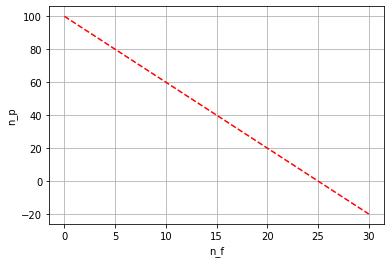

In [10]:
n_f = np.linspace(0, 30, 100)

# Omejitve
n_p1 = (1000 - 40*n_f)/10
n_p2 = (2000 - 20*n_f)/50
# kriterij
npk = (-0.5*n_f + 12.5)

# Make plot
plt.plot( n_f, n_p1, 'r--', label='sms'  )
#plt.plot(n_f, n_p2, 'b--', label='minutes')
#plt.plot(n_f, npk, 'g--', label='criterion')

#plt.xlim((0, 30))
#plt.ylim((0, 50))
plt.xlabel('n_f')
plt.ylabel('n_p')

#plt.fill_between(n_f, n_p1 , where=(n_p2 >= n_p1),color='grey', alpha=0.5)
#plt.fill_between(n_f, n_p2 , where=(n_p1 >= n_p2),color='grey', alpha=0.5)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()
plt.show()


### Ohlapne spremenljivke / Slack variables
Z uporabo ohlapnih spremenljivk spremenimo omejitve problema iz neenačb v enačbe. 
To sicer pomeni, da uvedemo toliko dodatnih spremenljik, kot imamo omejitev, vendar v 
zameno zato dobimo pri rešitvi še en dodaten podatek ­ koliko nam še manjka do dejanske meje. 
V primeru prvega problema tako nazaj dobimo podatek koliko SMS sporočil in minut pogovora ostane 
 ostane neizkoriščenih.

>The use of slack variables enables us to redefine constraints from previous examples. While this means introducing 
>as many new variables as there are constraints, the benefits outweigh the cost. Solving such a problem 
>provides us with additional data about the solution - how far is the solution from reaching the actual constraint. 
>Using the first example the mobile service provider can gain information on how much of the leased capacities (sms, minutes) remain free 
>after reaching the optimal number of subscribers. 

### Naloga 2: Ohlapne spremenljivke

Spremenite definicijo omejitev. Uporabite novi spremenljivki s_sms in s_min in preverite ter komentirajte rešitev.
Primer:

> Task 1: Define and use slack variables s_sms and s_min to find out about the remaining resouces. Example: 
 
>> 40 n_f + 10 n_p + s_sms = 1000; 
 

### Naloga 3 / Task 3

Zapiši naslednji problem ter najdi optimalno rešitev. Spremenljivke so realne.
> By using LPSolve find the solution of the following maximization problem. The variables are real-valued.

* Max:  $C(x_1,x_2) = 3*x_1 - 1.5*x_2 + 10$
* $2*x_1 + x_2 <= 18$
* $-2*x_1 + x_2 <= 5$
* $x_1 - x_2 <= 2$
* $x_1 >= -1$
* $x_2 >= 1$

> <b>Bonus (optional):</b> Izriši problem grafično in grafično najdi rešitev. Plot a problem and find graphical solution. <br>
> <b>Bonus (optional):</b> Dodaj še ohlapne spremenljivke in reši problem ter komentiraj omejitve. <br>



## Primer 2: Iskanje najkrajše poti v omrežju (grafu)   
> Example 2: Finding shortes path in a network graph

Definirajte kriterijsko funkcijo in potrebne omejitve za izračun najkrajše poti od izvora do ponora. V LP Solve preizkusite 
problem ILP (cela števila oziroma binarna števila) problem.

> Finding a shortest path in a graph can also be defined as a LP problem. 

In [3]:
#from IPython.display import Image
#Image("Omrezje.png")

![Graf](Omrezje2022.png "Graf omrežja")

<b>Zapis problema / Problem statement:</b>

Iščemo najkrajšo pot iz vozlišča A v vozlišče H, kjer števila na povezavah predstavljajo dolžino poti. Vrednost Vsake spremenljivke
bo pomenila, ali je povezava med vozliščema vključena v najkrajšo pot ali ne, torej bodo spremenljivke binarne. Definiramo jih torej kot:
> We need to find shortest path from node A to node H. We will define binary variables (0,1) whose value defines if the connection is part 
>of the shortest path.  

<code>bin ab, ac .... ;</code> 

Kriterijska funkcija je minimum vsote dolžin vključenih povezav, zapisati moramo vsoto vseh možnih povezav na način:
> Criterion function is a minimum of sum of all included links

<code>min: + 42 ab + 7 ac + 18 ad + ......; </code>

Omejitve spremenljivk zapišemo za vsako vozlišče. Za vozlišče A velja, da mora iz njega voditi natanko 1 pot, torej:
> Constraints need to be defined for each node. For node A, the sum of connections is 1: 

<code> +ab + ac + ad = 1;</code>

Za druga vozlišča pa velja, da zapišemo + in - glede na usmeritve puščic (poti), ter mora biti vsota 0 (po eni povezavi pridemo, po drugi gremo).
Pri zadnjem pa je vsota -1. 

<code> -ab -bc -bf + bh = 0; </code>



### Naloga 4 / Task 4:
* Zapiši formulacijo problema in poišči rešitev. Katera pot (zaporedje vozlišč) je najkrajša?
* Ali obstaja še kakšna ekvivalentna pot z enako dolžino ?
* Kako bi poiskal najdaljšo pot iz A v vozlišče I?

> Tasks:
> * Write complete problem formulation in LPSolve IDE, and use LPSolve to find a solution. Describe the resulting shortest path.
> * Is there any other alternative solution (check the graph)?
> * Try to change a formulation to find a longest path. 


### Naloga 5 / Task 5 (Bonus): 
Uporabi lastni graf iz predhodne naloge, dodaj uteži povezavam in definiraj LP problem najkrajše poti. Opiši rešitev.

>Use the graph that you designed as part of your previous homework. Add costs to each of the edges and 
create a LP problem to find the shortest path between two selected nodes. 

> <b>Bonus (optional):</b> visualize graph and shortest path in Jupyter using networkx library. 